In [79]:
import os
import shutil

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Setup and data organization

In [15]:
path = './breast_data/'
data = './bcd/'

In [17]:
for folder in os.listdir(path):
  print(f"{os.path.join(path,folder)}")
  for classes in os.listdir(os.path.join(path,folder)):
    for image in os.listdir(f"{os.path.join(path,folder)}/{classes}"):
      shutil.move(f"{os.path.join(path,folder)}/{classes}/{image}",f"./{data}/{classes}")

./breast_data/10253
./breast_data/10254
./breast_data/10255
./breast_data/10256
./breast_data/10257
./breast_data/10258
./breast_data/10259
./breast_data/10260
./breast_data/10261
./breast_data/10262
./breast_data/10264
./breast_data/10268
./breast_data/10269
./breast_data/10272
./breast_data/10273
./breast_data/10274
./breast_data/10275
./breast_data/10276
./breast_data/10277
./breast_data/10278
./breast_data/10279
./breast_data/10282
./breast_data/10285
./breast_data/10286
./breast_data/10288
./breast_data/10290
./breast_data/10291
./breast_data/10292
./breast_data/10293
./breast_data/10295
./breast_data/10299
./breast_data/10300
./breast_data/10301
./breast_data/10302
./breast_data/10303
./breast_data/10304
./breast_data/10305
./breast_data/10306
./breast_data/10307
./breast_data/10308
./breast_data/12241
./breast_data/12242
./breast_data/12626
./breast_data/12748
./breast_data/12749
./breast_data/12750
./breast_data/12751
./breast_data/12752
./breast_data/12810
./breast_data/12811


## Pre-procesing

In [18]:
dataset = tf.keras.utils.image_dataset_from_directory(data)

Found 276639 files belonging to 2 classes.


In [36]:
breast_data = dataset.as_numpy_iterator()
batch = breast_data.next()

In [39]:
batch

(array([[[[240., 233., 234.],
          [240., 233., 234.],
          [240., 233., 234.],
          ...,
          [234., 167., 193.],
          [234., 167., 193.],
          [234., 167., 193.]],
 
         [[240., 233., 234.],
          [240., 233., 234.],
          [240., 233., 234.],
          ...,
          [234., 167., 193.],
          [234., 167., 193.],
          [234., 167., 193.]],
 
         [[240., 233., 234.],
          [240., 233., 234.],
          [240., 233., 234.],
          ...,
          [234., 167., 193.],
          [234., 167., 193.],
          [234., 167., 193.]],
 
         ...,
 
         [[233., 172., 196.],
          [233., 172., 196.],
          [233., 172., 196.],
          ...,
          [228., 172., 192.],
          [228., 172., 192.],
          [228., 172., 192.]],
 
         [[233., 172., 196.],
          [233., 172., 196.],
          [233., 172., 196.],
          ...,
          [228., 172., 192.],
          [228., 172., 192.],
          [228., 172., 192.

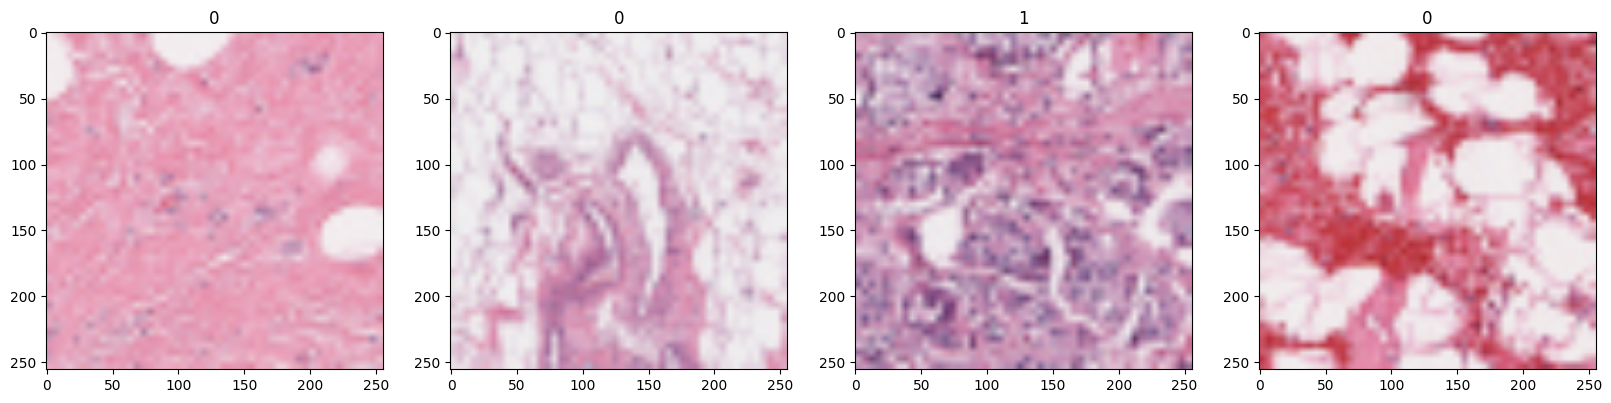

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [38]:
breast_data_scaled = dataset.map(lambda x,y: (x/255, y))

In [40]:
bd_scaled = breast_data_scaled.as_numpy_iterator()
bd_batch = bd_scaled.next()

In [41]:
bd_batch

(array([[[[0.6       , 0.5176471 , 0.6666667 ],
          [0.6       , 0.5176471 , 0.6666667 ],
          [0.6       , 0.5176471 , 0.6666667 ],
          ...,
          [0.49803922, 0.4509804 , 0.6       ],
          [0.49803922, 0.4509804 , 0.6       ],
          [0.49803922, 0.4509804 , 0.6       ]],
 
         [[0.6       , 0.5176471 , 0.6666667 ],
          [0.6       , 0.5176471 , 0.6666667 ],
          [0.6       , 0.5176471 , 0.6666667 ],
          ...,
          [0.49803922, 0.4509804 , 0.6       ],
          [0.49803922, 0.4509804 , 0.6       ],
          [0.49803922, 0.4509804 , 0.6       ]],
 
         [[0.6       , 0.5176471 , 0.6666667 ],
          [0.6       , 0.5176471 , 0.6666667 ],
          [0.6       , 0.5176471 , 0.6666667 ],
          ...,
          [0.49803922, 0.4509804 , 0.6       ],
          [0.49803922, 0.4509804 , 0.6       ],
          [0.49803922, 0.4509804 , 0.6       ]],
 
         ...,
 
         [[0.6509804 , 0.44313726, 0.6117647 ],
          [0.65098

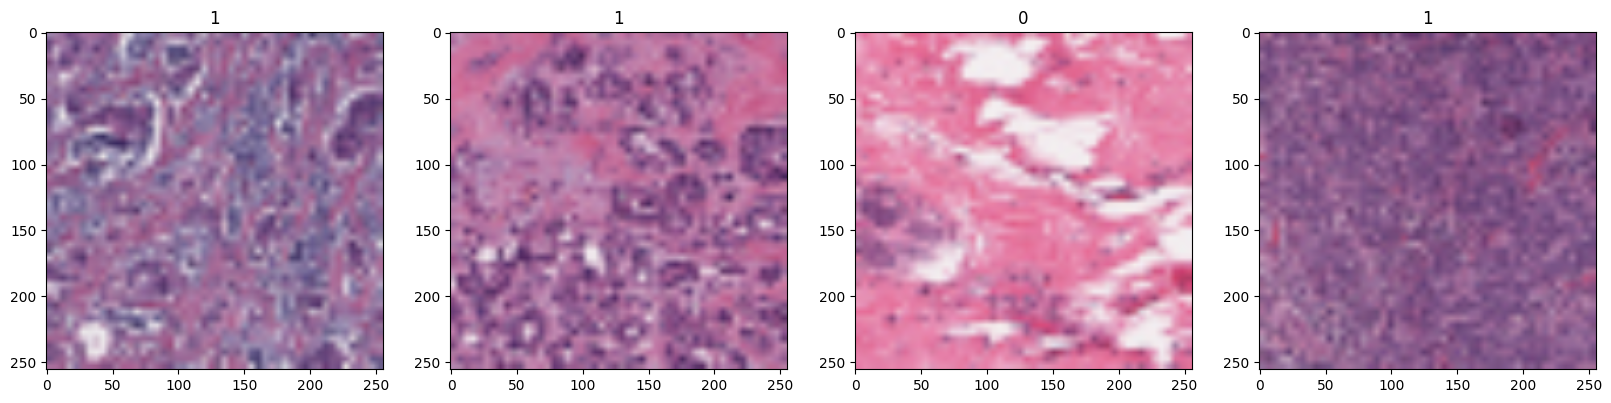

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(bd_batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(bd_batch[1][idx])

## Spliting the data

In [46]:
len(data)

6

In [143]:
train_data = int(len(data)*.7)
val_data = int(len(data)*.2)
test_data = int(len(data)*.1)+1

print(f'Train Percentage: {train_data}\nValidation Percentage: {val_data}\nTest Percentage: {test_data}')

Train Percentage: 4
Validation Percentage: 1
Test Percentage: 1


In [104]:
train = breast_data_scaled.take(train_data)
val = breast_data_scaled.skip(train_data).take(val_data)
test = breast_data_scaled.skip(train_data+val_data).take(test_data)

## Building the model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [116]:
model = Sequential()

In [117]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [118]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 16)       

## Train

In [119]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [120]:
hist = model.fit(train, epochs=50, validation_data=val,callbacks=[early_stopping_callback])

Epoch 1/50


4/4 [==============================] - 6s 1s/step - loss: 1.0810 - accuracy: 0.7422 - val_loss: 0.6328 - val_accuracy: 0.7812
Epoch 2/50
4/4 [==============================] - 4s 948ms/step - loss: 0.6734 - accuracy: 0.6484 - val_loss: 0.6695 - val_accuracy: 0.6875
Epoch 3/50
4/4 [==============================] - 4s 1s/step - loss: 0.6605 - accuracy: 0.6797 - val_loss: 0.6168 - val_accuracy: 0.7188
Epoch 4/50
4/4 [==============================] - 4s 941ms/step - loss: 0.6156 - accuracy: 0.6719 - val_loss: 0.4699 - val_accuracy: 0.8125
Epoch 5/50
4/4 [==============================] - 4s 949ms/step - loss: 0.6557 - accuracy: 0.6484 - val_loss: 0.5616 - val_accuracy: 0.7812
Epoch 6/50
4/4 [==============================] - 4s 963ms/step - loss: 0.5954 - accuracy: 0.6953 - val_loss: 0.5364 - val_accuracy: 0.7500
Epoch 7/50
4/4 [==============================] - 4s 980ms/step - loss: 0.5784 - accuracy: 0.7188 - val_loss: 0.4571 - val_accuracy: 0.8125
Epoch 8/50
4/4 [=====================

In [73]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

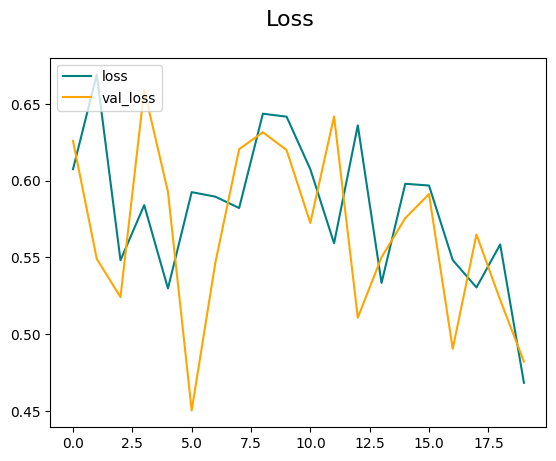

In [93]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=16)
plt.legend(loc='upper left')
plt.show()

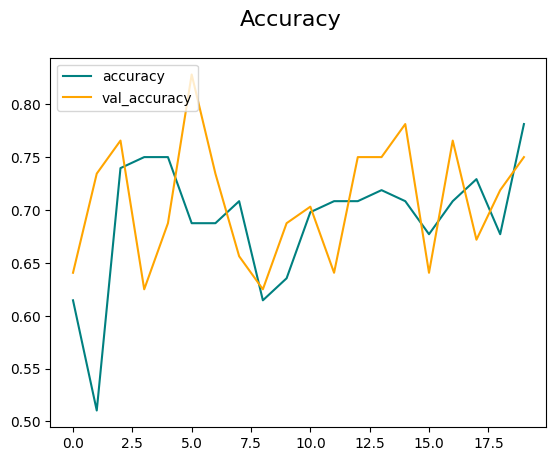

In [94]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=16)
plt.legend(loc='upper left')
plt.show()

## Testing

In [125]:
test_image = test.as_numpy_iterator().next()

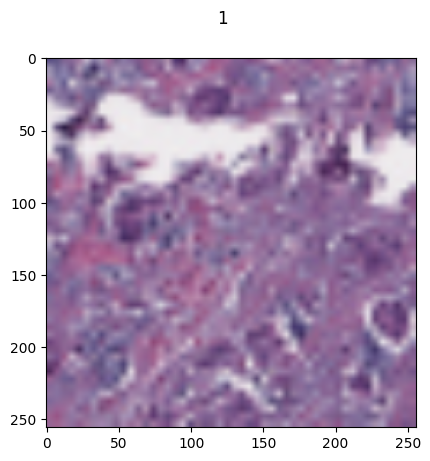

In [144]:
plt.imshow(test_image[0][3])
plt.suptitle(test_image[1][3])
plt.show()

In [142]:
model.predict(np.expand_dims(test_image[0][3],0))

1/1 [==============================] - 0s 48ms/step


array([[0.5982334]], dtype=float32)